# Árvores de decisão para classificação

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
import common as com

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

from sklearn import datasets

x, y = datasets.load_iris(return_X_y=True)
x = x[:,2:4]

labels = [0, 1, 2]
label_names = ['Setosa', 'Versicolor', 'Virginica']
colors = ['green', 'blue', 'red']

def plot_data(x, y, marker='o', legend=False, only_data=False):
    plt.rcParams.update({'font.size': com.fontsize})
    for i, label in enumerate(labels):
        if only_data:
            plt.scatter(x[y == label,0], x[y == label,1],
                        s=10*com.markersize, marker=marker, color=colors[i], label=label_names[label])
        else:        
            plt.scatter(x[y == label,0], x[y == label,1],
                        s=10*com.markersize, marker=marker, color=colors[i], label=label_names[label])
    if legend:
        plt.legend()
        
    
fig = plt.figure(figsize=com.figsize)
plot_data(x, y, legend=True)
plt.xlabel("Comprimento da pétala")
plt.ylabel("Largura da pétala")
plt.savefig('figs/iris_petala.png', dpi=com.dpi)
plt.show()
xlim = fig.gca().get_xlim() 
ylim = fig.gca().get_ylim() 

<Figure size 800x600 with 1 Axes>

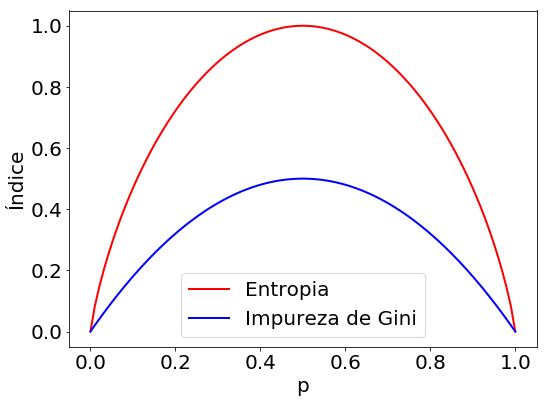

In [2]:
def calc_entropy(p):
    return - p * np.log2(p + 10 ** -6) - (1-p) * np.log2((1-p) + 10 ** -6)

def calc_gini(p):
    return 1 - p ** 2 - (1-p) ** 2

p = np.linspace(0, 1, 100)

fig = plt.figure(figsize=com.figsize)
plt.rcParams.update({'font.size': com.fontsize})
plt.plot(p, calc_entropy(p), '-r', linewidth=com.linewidth, label="Entropia")
plt.plot(p, calc_gini(p), '-b', linewidth=com.linewidth, label="Impureza de Gini")
plt.xlabel("p")
plt.ylabel("Índice")
plt.legend()
#plt.savefig('figs/entropia_gini.png', dpi=com.dpi)

In [3]:
np.random.seed(12345)

number_train = int(np.ceil(0.7*(x.shape[0])))
random_index = np.random.permutation(x.shape[0])
train_index = random_index[:number_train+1]
test_index = random_index[number_train+1:]

x_train = x[train_index]
x_test = x[test_index]
y_train = y[train_index]
y_test = y[test_index]

print("Número de padrões de treinamento: %d" % len(y_train))
print("Número de padrões de teste: %d" % len(y_test))

Número de padrões de treinamento: 106
Número de padrões de teste: 44


## Solução via Árvore de Decisão

In [4]:
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(x_train, y_train)

pred = tree_classifier.predict(x_test)

Taxa de erro no teste: 11.36%


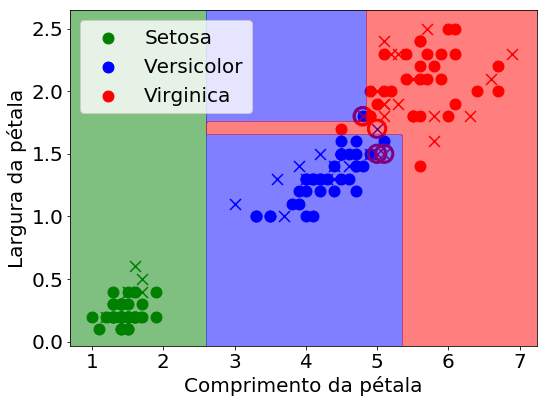

In [5]:
plt.rcParams.update({'font.size': com.fontsize})
fig, ax = plt.subplots(figsize=com.figsize)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plot_data(x_train, y_train, legend=True)
plot_data(x_test, y_test, marker='x', only_data=False, legend=False)
wrong_index_test = y_test != pred
ax.scatter(x_test[wrong_index_test,0], x_test[wrong_index_test,1], s=300, facecolors='none', edgecolors='r', linewidth=3)
xx, yy = com.make_meshgrid(x[:,0], x[:,1])
com.plot_contours(ax, None, lambda x_new, model: np.array(tree_classifier.predict(x_new)), xx, yy, colors)
plt.xlabel("Comprimento da pétala")
plt.ylabel("Largura da pétala")    
    
plt.savefig('figs/iris_tree_regions.png', dpi=com.dpi)
    
print("Taxa de erro no teste: %.2f%%" % (100*np.mean(wrong_index_test)))

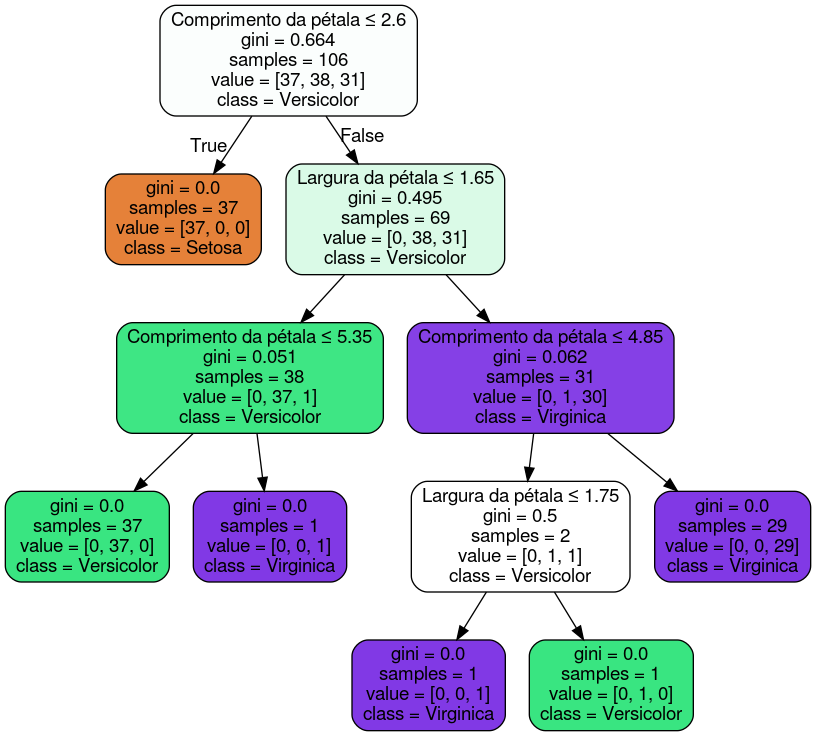

In [6]:
dot_data = StringIO()
export_graphviz(tree_classifier, out_file=dot_data,  
                filled=True, rounded=True, feature_names=['Comprimento da pétala', 'Largura da pétala'],
                special_characters=True, class_names=[str(l) for l in label_names])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree_iris.png')
Image(graph.create_png())

Confusion matrix
[[13  0  0]
 [ 0 11  1]
 [ 0  4 15]]


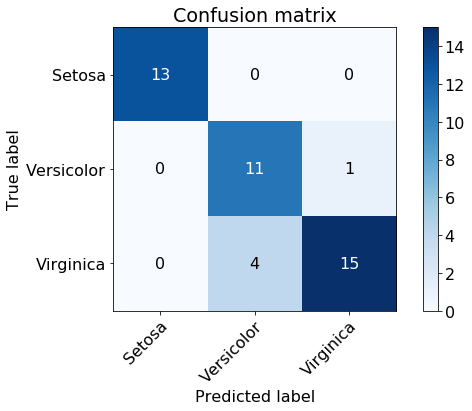

In [13]:
com.plot_confusion_matrix(y_test, y_pred=pred, classes=np.array(label_names),
                      title="Confusion matrix")
plt.savefig('figs/iris_tree_confusion.png', dpi=com.dpi)
plt.show()